In [1]:
import pickle
import os
import matplotlib.pyplot as plt
import sys
sys.path.append('..')
from ANEMO import read_edf
import numpy as np
%matplotlib inline

In [2]:
timeStr = '2017-10-23_100057'
observer = 'AM'
mode = 'enregistrement'

In [3]:
import glob
liste = {'pari':{}, 'enregistrement':{}}

for fname in glob.glob('data/*pkl'):
    a = fname.split('/')[1].split('.')[0].split('_')
    liste[a[0]][a[1]] = a[2]+'_'+a[3]

SUJETS = liste['pari'].keys()
data, exp = {}, {}

for s in SUJETS :
    with open('data/pari_%s_%s.pkl'%(s, liste['pari'][s]), 'rb') as fichier :
        exp[s] = pickle.load(fichier, encoding='latin1')
    
    resultats = os.path.join('..','data', 'enregistrement_' + s + '_' + liste['enregistrement'][s] + '.asc')
    data[s] = read_edf(resultats, 'TRIALID')

In [4]:
from ANEMO import ANEMO
from aSPEM import Analysis
e = Analysis(name_file_fit='fct_velocity_sigmo')

463 63
-0.34061466488662734


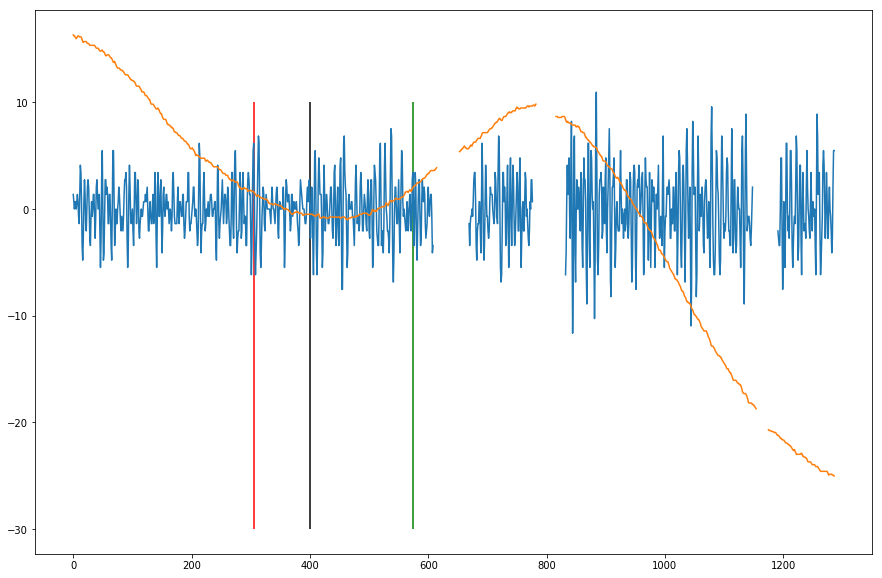

In [5]:
fig, ax = plt.subplots(1,1, figsize=(15,15/1.5))

for s in ['AM'] : #SUJETS :
    A = ANEMO(exp[s]) 
    N_blocks = exp[s]['N_blocks']
    N_trials = exp[s]['N_trials']
    
    size = []
    
    for block in [0] : #range(N_blocks) :
        for trial in [0] : #range(N_trials) :
            trial_data = trial + N_trials*block
            arg = A.arg(data[s][trial_data], trial=trial, block=block)
            
            Full = e.Full_list(modes_bcp=[])
            
            taille = data[s][trial_data]['size']
            for sacc in arg.saccades :
                taille[sacc[0]-arg.t_0 : sacc[1]-arg.t_0] = np.nan
            size.append(list(taille[arg.TargetOn-arg.t_0-400:]))
            
            ax.plot(np.gradient(A.velocity_NAN(**arg)[arg.TargetOn-arg.t_0-400:]))
            ax.plot(100*(size[0]/np.nanmean(size[0]))-100)
            ax.vlines(400, -30, 10)
            
            ax.vlines(e.ENREGISTREMENT[s]['start_anti'][block][trial]+400, -30, 10, color='r')
            ax.vlines(e.ENREGISTREMENT[s]['latency'][block][trial]+400, -30, 10, color='g')
            
            print(np.nanargmin(size[0][:800]), np.nanargmin(size[0][:800])-400)
            print(Full['va'][Full.sujet==s].values.tolist()[trial_data]);
    #ax.plot(np.nanmean(size))

'size' = taille de la pupille

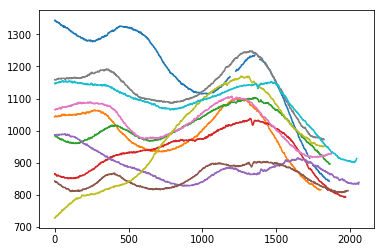

In [6]:
for x in range(10) :
    plt.plot(data['AM'][x]['size']);